
# Project: Analysis of No-show Appointment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

The No-show appointment dataset is made up of information of 100 thousand medical appointment in Brazil with the main aim of determing whether patients show up for their appointments and what factors influence this. There are 14 variables in the dataset which are as follows: 'PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received'.
> 
> **Questions**
> 1. Are appointment for patients who are not enrolled in the Brazilian Welfare program generally fufilled?
> 2. Are appointments of patients that get SMS reminders generally fufilled?
> 3. For the location with the highest no_shows, how many of them where female?

> Problems with the dataframe that need to be corrected will be represented in **bold**

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Loading data into df and reading 5 lines
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Checking dimensions of dataset
df.shape

(110527, 14)

> The dataset has 14 coloumns (characteristics or variables) and 110527 rows (appointments or entries)|

In [4]:
# Checking column names
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

> **The column names start with capital letters. <br>
There is also a mix of names with underscores and hyphens. <br>
This will be corrected**

In [5]:
# Checking the number of null values as well as the datatype of columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> There are no null values. <br>
There are no issues with datatypes of columns that will be needed for analysis

In [6]:
# Checking for duplicates

df.duplicated().sum()

0

> There are no duplicated rows i.e., appointment in the dataset

In [7]:
# Checking summary statistics of dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> **The minimum age in the dataset is -1 which is unrealistic. This will be investigated and corrected.**

In [8]:
# Checking the number of unique values in each column

df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> There are 5 unique values for Handcap instead of 2 for True and False according to the documentation - Every number greater than 0 would represent 1 or True in this case
>
> **There are more appointments (appointmentid) than there are patient (patientid) which implies that some patients had more than one appointment**

In [9]:
df.Handcap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

### Data Cleaning

In [10]:
# Making column names lower case and replacing hyphens with underscores

df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace("-", "_")
df.columns

# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

> As shown above, column names all have a similar format now

In [11]:
# Correct minimum age (-1) issue
# Checking number of rows with ages 0 and less

df.age[df['age'] <= 0].count()

3540

> **There are 3540 appointments or rows with 3540 ages or less. 
> After looking at the description from the docs file and the kaggle page, there is some ambiguity as to the cause of this**

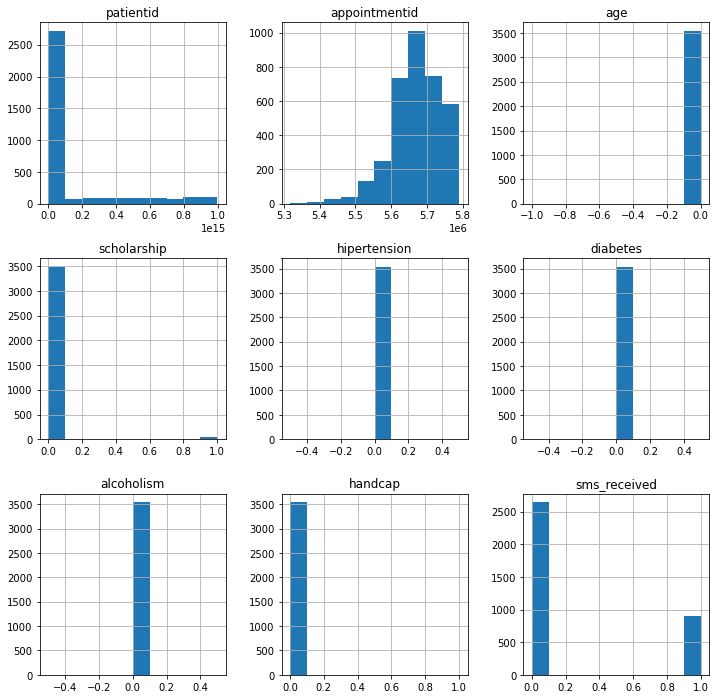

In [12]:
# Checking for any similarities in other variables for rows with ages 0 and less

df[df['age'] <= 0].hist(figsize = (12, 12));

> There is no clear cut correlations between the columns of the dataset when age is 0 or less. **Thus these rows are dropped**.

In [13]:
# dropping rows were age is 0 or less

df.drop(df[df['age'] <= 0].index, inplace = True)
df.shape

(106987, 14)

> All rows were ages were 0 or less have been dropped. The resulting dataframe has 106987 rows

In [14]:
# checking distribution of values in no_show column

df.no_show.value_counts()

No     85307
Yes    21680
Name: no_show, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis
### 1. Are appointment for patients who are not enrolled in the Brazilian Welfare program fufilled?

In [15]:
# creating a new dataframe of people that did not show

df_no_show_yes = df.query('no_show == "Yes"')

df_no_show_yes.scholarship.value_counts()

0    19109
1     2571
Name: scholarship, dtype: int64

In [16]:
# creating a new dataframe people that showed

df_no_show_no = df.query('no_show == "No"')

df_no_show_no.scholarship.value_counts()

0    77069
1     8238
Name: scholarship, dtype: int64

In [17]:
# creating utitlity variables

ind = df_no_show_yes.scholarship.value_counts().index
height_no = df_no_show_no.scholarship.value_counts()
height_yes = df_no_show_yes.scholarship.value_counts()

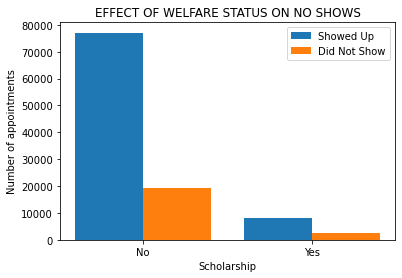

In [18]:
# plot comparing whether welfare affected people showing up

width = 0.4

bar_no = np.arange(len(ind))
bar_yes = bar_no + width

plt.title("EFFECT OF WELFARE STATUS ON NO SHOWS")
plt.bar(bar_no, height_no, width, label = 'Showed Up')
plt.bar(bar_yes, height_yes, width, label = 'Did Not Show')

plt.xticks(bar_no+width/2, ["No", "Yes"])
plt.xlabel('Scholarship');
plt.ylabel('Number of appointments');
plt.legend();
plt.show();

Generally, the number of appointments that showed are higher irrespective of their Brazilian Welfare status. By comparing appointments that showed up, patients who are not enrolled in the welfare program show up more than patients that who are enrolled. When patients that didnt show up are compared, the same trend is observed which shows that there is no real correlation between welfare status and no shows. There are more people who did not have welfare than people who did. Using proportions instead should give a better visual.

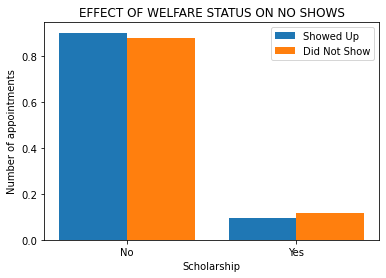

In [19]:
# plot comparing whether welfare affected people showing up

width = 0.4

bar_no = np.arange(len(ind))
bar_yes = bar_no + width

plt.title("EFFECT OF WELFARE STATUS ON NO SHOWS")
plt.bar(bar_no, height_no/height_no.sum(), width, label = 'Showed Up')
plt.bar(bar_yes, height_yes/height_yes.sum(), width, label = 'Did Not Show')

plt.xticks(bar_no+width/2, ["No", "Yes"])

# setting x and y labels
plt.xlabel('Scholarship');
plt.ylabel('Number of appointments');

# including a legend
plt.legend();

# show plot
plt.show();

The above plot using proportions shows that according to the data, person is more likely to show up when they dont have welfare. 

### 2. Are appointments of patients that get SMS reminders generally fufilled?
> This question seeks to find out how sms reminders affected a person showing up or not showing up for their appointments
>
> To answer this question, only appointments/patients that received sms reminders will be considered. And whether they generally show up when they receive the reminders

In [20]:
# checking for number of sms received

df.sms_received.value_counts()

0    72402
1    34585
Name: sms_received, dtype: int64

> There where generally more sms received

In [21]:
# conditionally selecting a dataframe of appointments where sms were received

df_sms_1 = df.query('sms_received == 1')
df_sms_1.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
15,9.994839e+10,5620206,F,2016-04-26T08:47:27Z,2016-04-29T00:00:00Z,15,NOVA PALESTINA,0,0,0,0,0,1,No
18,1.713538e+13,5621836,F,2016-04-26T10:54:18Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,1,0,0,0,0,1,No
22,8.632298e+14,5616091,M,2016-04-25T13:29:16Z,2016-04-29T00:00:00Z,13,CONQUISTA,0,0,0,0,0,1,Yes
25,5.819370e+12,5624020,M,2016-04-26T15:04:17Z,2016-04-29T00:00:00Z,46,CONQUISTA,0,1,0,0,0,1,No


In [22]:
# checking the no_show distribution for this appointments/patients that received sms

df_sms_1.no_show.value_counts()

No     25017
Yes     9568
Name: no_show, dtype: int64

We can tell from this that when considering people that received sms, receival of the sms corresponded to more people showing up, i.e., No No-show <br>

 **A piechart can be used to convey this information**

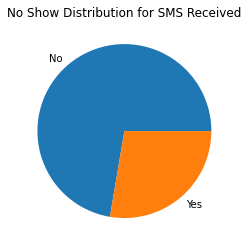

In [23]:
data = df_sms_1.no_show.value_counts()
ind = df_sms_1.no_show.value_counts().index

plt.title("No Show Distribution for SMS Received")
plt.pie(data, labels = ind);

As already stated above, this pie chart shows that, when an sms was sent, the patient was more likely to show up and fufill the appointment

### 3. For the location with the highest no shows, how many of them where appointments for females?

In [24]:
# checking the number of different locations in the dataframe

df.neighbourhood.value_counts()

JARDIM CAMBURI                 7586
MARIA ORTIZ                    5563
RESISTÊNCIA                    4235
JARDIM DA PENHA                3851
ITARARÉ                        3412
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

> There are 81 different neighbourhoods in the dataset. The neighbourhood that had the most number of appointments was JARDIM CAMBURI

In [25]:
# checking the gender distribution in the dataset

df.gender.value_counts()

F    70118
M    36869
Name: gender, dtype: int64

> Generally, more appointments were made for males than females

Next, we can use the dataframe of no shows and determine which location is present on this the most

In [26]:
df_no_show_yes.neighbourhood.value_counts()

JARDIM CAMBURI                 1432
MARIA ORTIZ                    1194
ITARARÉ                         898
RESISTÊNCIA                     875
CENTRO                          692
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: neighbourhood, Length: 80, dtype: int64

> JARDIM CAMBURI is the location with the most number of no shows

Next, through conditional selection, a dataframe for appointments with JARDIM CAMBURI as location is selected

In [27]:
# conditionally selecting a dataframe for appointments with location, JARDIM CAMBURI

df_jardim = df_no_show_yes.query('neighbourhood == "JARDIM CAMBURI"')
df_jardim.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
446,2.449424e+10,5562707,F,2016-04-08T14:13:23Z,2016-04-29T00:00:00Z,60,JARDIM CAMBURI,0,0,0,0,0,1,Yes
448,6.281844e+13,5564809,M,2016-04-11T08:06:06Z,2016-04-29T00:00:00Z,12,JARDIM CAMBURI,0,0,0,0,0,1,Yes
575,2.997788e+14,5609550,M,2016-04-20T16:09:23Z,2016-04-29T00:00:00Z,23,JARDIM CAMBURI,0,0,0,0,0,1,Yes
610,3.385224e+12,5634237,M,2016-04-28T10:37:09Z,2016-04-29T00:00:00Z,48,JARDIM CAMBURI,0,0,0,0,0,0,Yes
1960,9.758229e+14,5628416,M,2016-04-27T10:59:08Z,2016-04-29T00:00:00Z,17,JARDIM CAMBURI,0,0,0,0,0,0,Yes


In [28]:
# grouping dataframe to select gender column for analysis

df_jardim['gender'].value_counts()

F    979
M    453
Name: gender, dtype: int64

For the location with the highest no shows, 979 of them where appointments for females whilst 453 of them where appointments for males. A histogram provides a better visualization

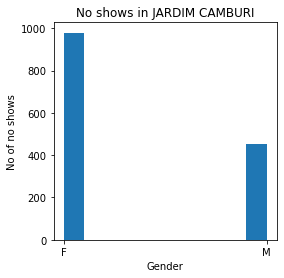

In [29]:
plt.figure(figsize = (4, 4))
plt.hist(df_jardim['gender']);

plt.title("No shows in JARDIM CAMBURI")
plt.xlabel("Gender")
plt.ylabel("No of no shows");

<a id='conclusions'></a>
## Conclusions

**Issues**: 
> 1. There was a much larger class of no_shows than there were appointments that showed. 
> 2. Also there was much more appointments for females than appointments for males

The questions to be answered where as follows <br>
1. Are appointment for patients who are not enrolled in the Brazilian Welfare program generally fufilled?
2. Are appointments of patients that get SMS reminders generally fufilled?
3. For the location with the highest no_shows, how many of them where female?

1. Generally, the number of appointments that showed are higher irrespective of their Brazilian Welfare status. By comparing appointments that showed up, patients who are not enrolled in the welfare program show up more than patients who are enrolled. When patients that didnt show up are compared, the same trend is observed which shows that there is no real correlation between welfare status and no shows. There are more people who did not have welfare than people who did. By using proportions, a better insight into the data was obtained. A positive correlation was seen between appointmets of people with welfare and no shows

2. The receival of an sms, usually corresponds to a patient showing up for their appointment

3. The location with the highest no shows was JARDIM CAMBURI and 979 of the appointments made were for femalse

<a id='references'></a>
## References

1. https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
2. https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#emphasis
3. https://www.youtube.com/watch?v=ZjQCPMO7LBE
4. https://matplotlib.org/stable/index.html